In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [58]:
car_dataset = pd.read_csv('/content/train_data.csv')

In [59]:
car_dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208764 entries, 0 to 208763
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     208764 non-null  int64 
 1   seller                 208764 non-null  object
 2   offer_type             208764 non-null  object
 3   price                  208764 non-null  int64 
 4   abtest                 208764 non-null  object
 5   vehicle_type           208764 non-null  object
 6   year_of_registration   208764 non-null  int64 
 7   gearbox                208764 non-null  object
 8   power                  208764 non-null  int64 
 9   model                  208764 non-null  object
 10  kilometer              208764 non-null  int64 
 11  month_of_registration  208764 non-null  int64 
 12  fuel_type              208764 non-null  object
 13  brand                  208764 non-null  object
 14  not_repaired_damage    208764 non-null  object
 15  

In [60]:
seller_data = car_dataset.seller.value_counts()
seller_data

privat        208762
gewerblich         2
Name: seller, dtype: int64

In [61]:
# encoding "Fuel_Type" Column
car_dataset.replace({'seller':{'privat':0,'gewerblich':1}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'offer_type':{'Angebot':0,'Gesuch':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'abtest':{'test':0,'control':1}},inplace=True)

car_dataset.replace({'vehicle_type':{'limousine':0,'kleinwagen':1, 'kombi':2, 'bus' : 3, 'cabrio':4 , 'coupe':5 , 'suv' :6, 'andere':7 }},inplace=True)

car_dataset.replace({'gearbox':{'manuell':0,'automatik':1 }},inplace=True)

car_dataset.replace({'fuel_type':{'benzin':0,'diesel':1 , 'lpg':2, 'cng':3 , 'hybrid':4 , 'elektro':5 ,  'andere':6  }},inplace=True)

car_dataset.replace({'not_repaired_damage':{'nein':0,'ja':1 }},inplace=True)

In [62]:

print(car_dataset.offer_type.value_counts())
print(car_dataset.abtest.value_counts())
print(car_dataset.vehicle_type.value_counts())
print(car_dataset.gearbox.value_counts())
print(car_dataset.model.value_counts())
print(car_dataset.fuel_type.value_counts())
print(car_dataset.brand.value_counts())
print(car_dataset.not_repaired_damage.value_counts())




0    208761
1         3
Name: offer_type, dtype: int64
0    108590
1    100174
Name: abtest, dtype: int64
0    61082
1    47418
2    42676
3    19882
4    14892
5    11759
6     9629
7     1426
Name: vehicle_type, dtype: int64
0    159980
1     48784
Name: gearbox, dtype: int64
golf               16765
andere             16242
3er                12583
polo                7021
corsa               6655
                   ...  
i3                     4
rangerover             3
serie_3                3
samara                 2
discovery_sport        1
Name: model, Length: 250, dtype: int64
0    135504
1     69416
2      3183
3       366
4       180
6        66
5        49
Name: fuel_type, dtype: int64
volkswagen       43302
bmw              24342
mercedes_benz    21473
opel             21157
audi             19701
ford             13978
renault           9337
peugeot           6270
fiat              5144
seat              4049
skoda             3634
mazda             3217
toyota           

In [63]:
X = car_dataset.drop(['brand','price','model'],axis=1)
Y = car_dataset['price']
X.head()
Y.head()

0     8990
1    49900
2     7500
3     1350
4      650
Name: price, dtype: int64

In [64]:
X_train = X
Y_train = Y

In [65]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [66]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [71]:
training_data_prediction = lin_reg_model.predict(X_train)
training_data_prediction

array([10925.56998578, 27054.27866703,  3465.46427259, ...,
       12675.04283181,   195.40519321, 15988.7295285 ])

In [69]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.0003713678578620705


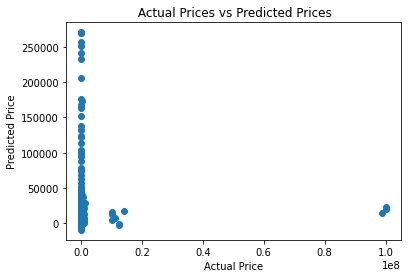

In [72]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [73]:
lass_reg_model = Lasso()

In [74]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [75]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [76]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.0003713654331269911


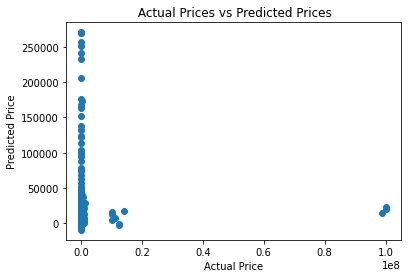

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [84]:
car_dataset = pd.read_csv('/content/test_data.csv')


# encoding "Fuel_Type" Column
car_dataset.replace({'seller':{'privat':0,'gewerblich':1}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'offer_type':{'Angebot':0,'Gesuch':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'abtest':{'test':0,'control':1}},inplace=True)

car_dataset.replace({'vehicle_type':{'limousine':0,'kleinwagen':1, 'kombi':2, 'bus' : 3, 'cabrio':4 , 'coupe':5 , 'suv' :6, 'andere':7 }},inplace=True)

car_dataset.replace({'gearbox':{'manuell':0,'automatik':1 }},inplace=True)

car_dataset.replace({'fuel_type':{'benzin':0,'diesel':1 , 'lpg':2, 'cng':3 , 'hybrid':4 , 'elektro':5 ,  'andere':6  }},inplace=True)

car_dataset.replace({'not_repaired_damage':{'nein':0,'ja':1 }},inplace=True)



print(car_dataset.offer_type.value_counts())
print(car_dataset.abtest.value_counts())
print(car_dataset.vehicle_type.value_counts())
print(car_dataset.gearbox.value_counts())
print(car_dataset.model.value_counts())
print(car_dataset.fuel_type.value_counts())
print(car_dataset.brand.value_counts())
print(car_dataset.not_repaired_damage.value_counts())


X_test = car_dataset.drop(['brand','model'],axis=1)

test_data_prediction = lin_reg_model.predict(X_test)
df = pd.DataFrame(test_data_prediction)

df

df.to_csv(r'/content/test_data_prediction.csv',index = 'false')

0    52191
1        1
Name: offer_type, dtype: int64
0    26928
1    25264
Name: abtest, dtype: int64
0    15312
1    11685
2    10766
3     5081
4     3657
5     2892
6     2453
7      346
Name: vehicle_type, dtype: int64
0    40079
1    12113
Name: gearbox, dtype: int64
golf          4193
andere        4052
3er           3062
polo          1807
corsa         1612
              ... 
i3               1
rangerover       1
samara           1
kappa            1
elefantino       1
Name: model, Length: 246, dtype: int64
0    33738
1    17558
2      754
3       94
4       33
5        8
6        7
Name: fuel_type, dtype: int64
volkswagen       10892
bmw               5989
mercedes_benz     5433
opel              5233
audi              5071
ford              3469
renault           2335
peugeot           1581
fiat              1221
seat               968
skoda              902
mazda              822
citroen            768
toyota             762
nissan             696
smart              649
hyun